In [148]:
import geopandas as gpd

In [149]:
roads = gpd.read_file('SH_SurfaceWater_Line.shp')
roads.head()

,ID,FEATCODE,geometry
0,7FB4F216-3D6B-4921-9D2C-2A3620893825,15600,"LINESTRING Z (244910.670 393267.790 0.000, 244..."
1,983BC5D4-D658-49A7-A6FA-03DF1BC7F75E,15600,"LINESTRING Z (244932.990 393006.200 0.000, 244..."
2,8ACDCA8C-D770-43AC-9E3B-D266CD475195,15600,"LINESTRING Z (245045.950 392936.870 0.000, 245..."
3,C735084B-F0A7-426C-A180-92271D9540F9,15600,"LINESTRING Z (245019.800 393314.470 0.000, 245..."
4,AB7E42AD-BF46-4406-9FCB-940537D39A43,15600,"LINESTRING Z (245146.000 391857.200 0.000, 245..."


In [189]:
selected_ids = ['02D0C0E6-5D5B-4A57-ABEA-FA006E4E3D32',
                '180269BF-9894-426B-A85F-2434668FB7F6',
                'A4AEDA94-EFB0-4A9A-8ED5-7B839ABBB58E',
                'B2FB259D-118B-4D37-918C-8F254ACA2F2B',
                'EE1174A8-2AAC-4A5C-8CD3-8E94DF987657']
selected_ids = ['02D0C0E6-5D5B-4A57-ABEA-FA006E4E3D32',
                'A4AEDA94-EFB0-4A9A-8ED5-7B839ABBB58E',
                'B2FB259D-118B-4D37-918C-8F254ACA2F2B',
                'EE1174A8-2AAC-4A5C-8CD3-8E94DF987657']
selected_ids = ['02D0C0E6-5D5B-4A57-ABEA-FA006E4E3D32',
                'A4AEDA94-EFB0-4A9A-8ED5-7B839ABBB58E',
                'B2FB259D-118B-4D37-918C-8F254ACA2F2B',]
selected_roads = roads[roads['ID'].isin(selected_ids)]
selected_roads

,ID,FEATCODE,geometry
91158,A4AEDA94-EFB0-4A9A-8ED5-7B839ABBB58E,15600,"LINESTRING Z (256402.150 325719.690 0.000, 256..."
91159,B2FB259D-118B-4D37-918C-8F254ACA2F2B,15600,"LINESTRING Z (256402.150 325719.690 0.000, 256..."
91164,02D0C0E6-5D5B-4A57-ABEA-FA006E4E3D32,15600,"LINESTRING Z (256452.060 325684.230 0.000, 256..."


<Axes: >

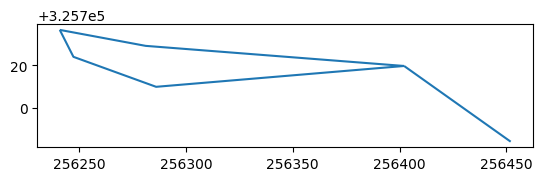

In [190]:
selected_roads.plot()

In [191]:
search_margin = 20

In [192]:
selected_roads.bounds

,minx,miny,maxx,maxy
91158,256240.88,325709.93,256402.15,325736.59
91159,256240.88,325719.69,256402.15,325736.59
91164,256402.15,325684.23,256452.06,325719.69


In [193]:
all_bounds = (min(selected_roads.bounds['minx'])-search_margin,
              min(selected_roads.bounds['miny'])-search_margin,
              max(selected_roads.bounds['maxx'])+search_margin,
              max(selected_roads.bounds['maxy'])+search_margin)
all_bounds

(256220.88, 325664.23, 256472.06, 325756.59)

In [194]:
max_extent = max((all_bounds[2]-all_bounds[0],
                  all_bounds[3]-all_bounds[1]))
centre = (0.5*(all_bounds[2]+all_bounds[0]),
          0.5*(all_bounds[3]+all_bounds[1]))
print(centre,max_extent)

(256346.47, 325710.41000000003) 251.17999999999302


In [195]:
from scipy.stats.qmc import PoissonDisk

In [196]:
import numpy as np

In [197]:
radius = 5.0
num_samples = (max_extent/radius)**2
sampler = PoissonDisk(d=2, radius=radius/max_extent)
scaled_samples = max_extent*(sampler.random(num_samples)-0.5)
num_samples = np.size(scaled_samples,0)
samples = scaled_samples + np.tile(np.array(centre),(num_samples,1))
print(samples,num_samples)

[[256235.46631729 325591.05756496]
 [256242.26840214 325596.76004568]
 [256228.83502277 325597.9321931 ]
 ...
 [256450.30111049 325835.60708817]
 [256443.68210006 325742.31204015]
 [256347.90957582 325835.26055347]] 1537


In [198]:
from shapely import Point, LineString

In [199]:
sample_points = [Point(samples[ii,0],samples[ii,1]) for ii in range(num_samples)]

In [200]:
sample_points = gpd.GeoSeries(sample_points,crs=roads.crs)

<Axes: >

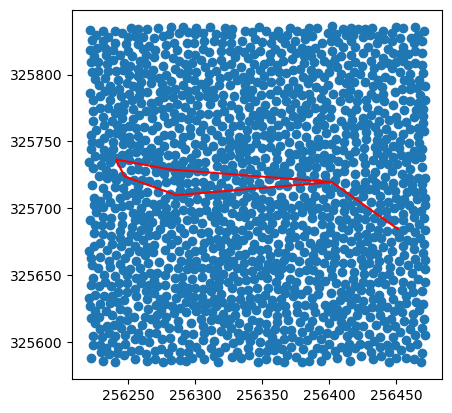

In [201]:
ax = sample_points.plot()
selected_roads.plot(ax=ax,color='red')

In [202]:
sample_distances = [min(selected_roads.distance(p)) for p in sample_points]
sample_distances

[128.97874653403971,
 121.29908641728588,
 124.77638452584712,
 134.99732176105624,
 126.26083499286739,
 133.03814966607436,
 129.43663847511456,
 125.85347947885019,
 136.3468499910989,
 119.23594959663046,
 125.97546471819955,
 117.394642551796,
 120.9677125333882,
 118.71756823289934,
 111.49153532530156,
 126.74685299140006,
 118.44587532721837,
 119.87162523494607,
 121.03240878234915,
 109.46691544146185,
 114.12713830520053,
 110.68410940068517,
 111.11941879805003,
 124.97369162147375,
 105.05626459530068,
 113.30921473049882,
 106.78104098178895,
 100.68151173384987,
 107.36196502847538,
 113.82568364945313,
 105.2620955737872,
 102.1213760153499,
 100.4162208015321,
 94.0563571868222,
 93.8647844942539,
 95.87444472461604,
 101.87932552336541,
 99.42795125893329,
 92.47817646248133,
 90.76659678049072,
 89.51030665729355,
 100.08159184134234,
 111.43889310773956,
 111.41831172236864,
 96.24769738661033,
 100.33684472643617,
 87.21216498095977,
 80.25800939355317,
 85.1370378

<Axes: >

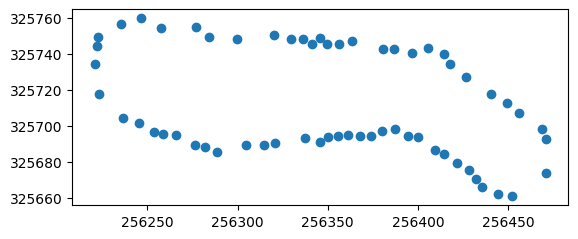

In [203]:
flags = [d < search_margin+0.95*radius and d > search_margin for d in sample_distances]
edge_points = sample_points[flags]
edge_points.plot()

<Axes: >

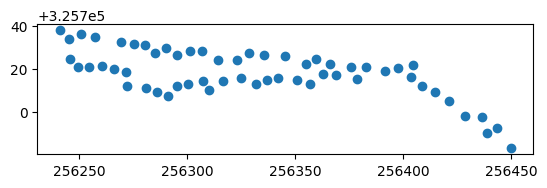

In [204]:
flags = [d < 0.6*radius for d in sample_distances]
road_points = sample_points[flags]
road_points.plot()

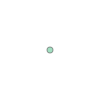

In [205]:
top_arg = np.argmax(edge_points.y)
top_point = edge_points.iloc[top_arg]
top_point

In [206]:
from shapely.ops import nearest_points

In [207]:
top_nearest = gpd.GeoSeries(nearest_points(top_point, selected_roads.unary_union))

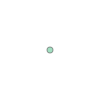

In [208]:
start_point = top_point
start_point

In [209]:
def opposing_point(first_point, overshoot=1.0):
    nearest_road = nearest_points(first_point, selected_roads.unary_union)[1]
    opposite_point = Point(first_point.x + (1.0+overshoot)*(nearest_road.x - first_point.x),
                           first_point.y + (1.0+overshoot)*(nearest_road.y - first_point.y))
    return opposite_point

opposing_point(start_point).xy

(array('d', [256237.49318062593]), array('d', [325712.97161879984]))

In [210]:
gdf_edge_points = gpd.GeoDataFrame(geometry=edge_points)
gdf_edge_points['visited'] = False

In [211]:
def closest_unvisited_edge_point_name(target_point):
    unvisited_points = gdf_edge_points[gdf_edge_points['visited']==False]
    ix_closest = np.argmin(unvisited_points.distance(target_point))
    closest_point_name = unvisited_points.iloc[ix_closest].name
    return closest_point_name
#closest_point_name = closest_unvisited_edge_point_name(opposite_point)

In [212]:
start_point = gdf_edge_points.iloc[top_arg]
gdf_edge_points.loc[start_point.name,'visited'] = True

In [213]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
tour = [start_point.geometry]
for ii in range(len(gdf_edge_points)):
    opposite_point = opposing_point(current_point.geometry)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256246.211 325759.847)>,
 <POINT (256236.254 325704.535)>,
 <POINT (256245.16 325701.748)>,
 <POINT (256257.318 325754.429)>,
 <POINT (256276.752 325754.595)>,
 <POINT (256265.971 325694.97)>,
 <POINT (256258.798 325695.532)>,
 <POINT (256283.953 325749.098)>,
 <POINT (256299.884 325748.444)>,
 <POINT (256304.897 325689.484)>,
 <POINT (256314.747 325689.614)>,
 <POINT (256320.444 325750.3)>,
 <POINT (256329.59 325748.064)>,
 <POINT (256320.798 325690.723)>,
 <POINT (256337.656 325693.547)>,
 <POINT (256341.376 325745.408)>,
 <POINT (256345.492 325748.893)>,
 <POINT (256345.723 325690.852)>,
 <POINT (256350.281 325693.814)>,
 <POINT (256349.729 325745.427)>,
 <POINT (256356.152 325745.706)>,
 <POINT (256355.514 325694.532)>,
 <POINT (256361.147 325694.865)>,
 <POINT (256363.416 325746.895)>,
 <POINT (256380.921 325742.78)>,
 <POINT (256379.978 325697.127)>,
 <POINT (256374.09 325694.429)>,
 <POINT (256386.608 325742.678)>,
 <POINT (256396.517 325740.259)>,
 <POINT (256394.631 3

In [214]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
start_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
tour = [Point(start_road.x,start_road.y),start_point.geometry]
for ii in range(len(gdf_edge_points)):
    nearest_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
    tour.append(Point(nearest_road.x,nearest_road.y))
    opposite_point = opposing_point(current_point.geometry,overshoot=0.75)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256241.852 325736.409)>,
 <POINT (256246.211 325759.847)>,
 <POINT (256241.852 325736.409)>,
 <POINT (256236.254 325704.535)>,
 <POINT (256245.16 325701.748)>,
 <POINT (256252.527 325722.067)>,
 <POINT (256257.318 325754.429)>,
 <POINT (256276.752 325754.595)>,
 <POINT (256272.316 325730.744)>,
 <POINT (256265.971 325694.97)>,
 <POINT (256258.798 325695.532)>,
 <POINT (256266.573 325716.974)>,
 <POINT (256283.953 325749.098)>,
 <POINT (256299.884 325748.444)>,
 <POINT (256298.275 325727.773)>,
 <POINT (256304.897 325689.484)>,
 <POINT (256314.747 325689.614)>,
 <POINT (256312.85 325712.186)>,
 <POINT (256320.444 325750.3)>,
 <POINT (256329.59 325748.064)>,
 <POINT (256327.832 325725.473)>,
 <POINT (256337.656 325693.547)>,
 <POINT (256345.723 325690.852)>,
 <POINT (256343.712 325714.78)>,
 <POINT (256341.376 325745.408)>,
 <POINT (256345.492 325748.893)>,
 <POINT (256343.574 325724.248)>,
 <POINT (256350.281 325693.814)>,
 <POINT (256355.514 325694.532)>,
 <POINT (256353.742 3

In [215]:
#append manual landing point - don't land in the water!
tour.append(Point(256494,325698))

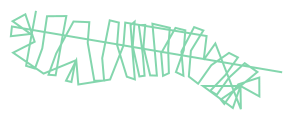

In [216]:
tour_line = LineString(tour)
tour_line

In [217]:
print(f'Length : {tour_line.length}m')
ave_speed = 2.5
print(f'Time at average speed {ave_speed}m/s : {tour_line.length/ave_speed}s')
print(f'That is {tour_line.length/(60*ave_speed)} minutes')

Length : 2368.1984573235454m
Time at average speed 2.5m/s : 947.2793829294181s
That is 15.787989715490303 minutes


<Axes: >

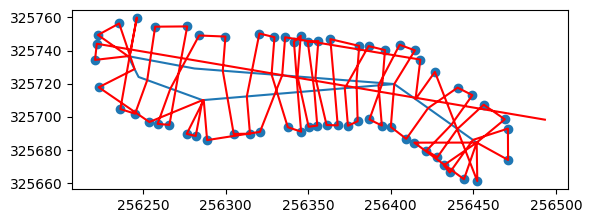

In [218]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
gdf_tour = gpd.GeoDataFrame(geometry=[tour_line])
gdf_tour.plot(ax=ax,color='red')

In [219]:
gdf_tour.crs = 'EPSG:27700'
gdf_tour_gps = gdf_tour.to_crs('EPSG:4326')

In [220]:
gdf_tour.to_file('drain_tour.shp')

In [221]:
gdf_tour_gps.to_file('drain_tour_gps.shp')

In [222]:
from pymavlink.mavwp import MAVWPLoader
from pymavlink.dialects.v20.common import MAVLink_mission_item_int_message, MAV_CMD_NAV_TAKEOFF, MAV_CMD_NAV_LAND

In [223]:
gdf_tour_gps['geometry'][0].coords[0]

(-4.134273238451284, 52.809956638450004)

In [224]:
alt = 20
alt_frame = 3
wp = MAVWPLoader()
takeoff_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_TAKEOFF, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            0, # int(wp.x*1.0e7),
            0, # int(wp.y*1.0e7),
            alt) # wp.z
wp.add(takeoff_cmd)
wp.add(takeoff_cmd)

In [225]:
for pt in gdf_tour_gps['geometry'][0].coords:
    wp.add_latlonalt(pt[1],pt[0],20.0)

In [226]:
land_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_LAND, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            gdf_tour_gps['geometry'][0].coords[-1][1], # int(wp.x*1.0e7), lat
            gdf_tour_gps['geometry'][0].coords[-1][0], # int(wp.y*1.0e7), lon
            0) # wp.z
wp.add(land_cmd)

In [227]:
    
file_name = 'drain_mission_long.txt'
wp.save(file_name)